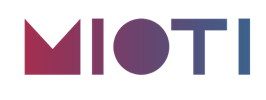
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S7 : Control de salud

## Objetivo

El objetivo de este challenge es entrenar un modelo para determinar el estado de salud de una persona en funcion de unas variables tomadas de la monitorizacion de 50 personas durante 31 dias tomando muestras cada hora del numero de pulsaciones por minuto, asi como el sexo, la edad y el peso de la persona. La etiqueta a predecir es el estado de salud (OK o BAD)en cada hora.


In [1]:
import datetime
from datetime import timedelta
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
import matplotlib.pyplot as plt




### Entrenamiento del modelo

Dispones de un dataset `health.csv` que contiene varias variables y su relación con el estado de salud del paciente (emergencia o situación normal). 

Analiza, preprocesalo y entrena un modelo para luego utilizarlo más adelante. Aplica lo consideres más relevante para este caso de lo que has aprendido durante la asignatura.

### Carga del dataset

In [2]:
df = pd.read_csv('health_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 8 columns):
id        37200 non-null int64
sex       37200 non-null int64
age       37200 non-null int64
weight    37200 non-null float64
day       37200 non-null object
hour      37200 non-null int64
bpm       37200 non-null int64
status    37200 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.3+ MB


In [4]:
df.head()

,id,sex,age,weight,day,hour,bpm,status
0,0,1,48,92.7,2007-12-01,0,95,OK
1,0,1,48,92.7,2007-12-01,1,100,OK
2,0,1,48,92.7,2007-12-01,2,107,OK
3,0,1,48,92.7,2007-12-01,3,97,OK
4,0,1,48,92.7,2007-12-01,4,97,OK


In [5]:
df.shape  # (24*31*50 , 8)

(37200, 8)

# Analizar los datos

* ¿Los datos tienen estructura de serie temporal? ¿Puedes hacer una grafica de la evolucion de bpm a lo largo de todos los dias para una persona?

* Elige que atributos pueden ser utiles para un modelo de clasificacion. Elimina los que no sean utiles.
* Crea la matriz de datos de entrenamiento: X e y, y divide los datos en entrenamiento y test

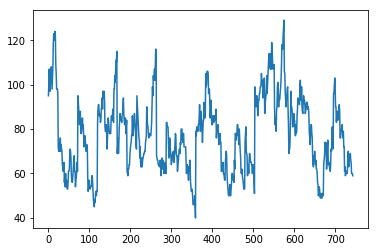

In [6]:
df[df.id==0].bpm.plot.line()

In [7]:
df[df.id==0]

,id,sex,age,weight,day,hour,bpm,status
0,0,1,48,92.7,2007-12-01,0,95,OK
1,0,1,48,92.7,2007-12-01,1,100,OK
2,0,1,48,92.7,2007-12-01,2,107,OK
3,0,1,48,92.7,2007-12-01,3,97,OK
4,0,1,48,92.7,2007-12-01,4,97,OK
5,0,1,48,92.7,2007-12-01,5,102,OK
6,0,1,48,92.7,2007-12-01,6,103,OK
7,0,1,48,92.7,2007-12-01,7,108,OK
8,0,1,48,92.7,2007-12-01,8,103,OK
9,0,1,48,92.7,2007-12-01,9,98,OK


# Entrenamiento sin ajustar los hiperparametros

* Entrena 3 modelos con los datos obtenidos anteriormente 
* Presenta los resultados sobre los conjuntos de entrenamiento y test

In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' # Requerido para utilizar xgboost > 0.8.0 en Jupyter

from xgboost.sklearn import XGBClassifier  

model1 = XGBClassifier()

In [9]:
dataset_X = df[['sex', 'age', 'weight', 'hour', 'bpm' ]]

In [10]:
df['status'] = df['status'].map({'OK': 0, 'BAD': 1})

In [11]:
dataset_y = np.array(df['status'])

In [12]:
dataset_y 

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [14]:
model1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [15]:
y_predict = model1.predict(X_test)  
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9962365591397849


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
model1.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9962365591397849

In [17]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()

In [18]:
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
model2.score(X_test, y_test)

0.9957885304659498

In [20]:
y_predict = model2.predict(X_test)  
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9957885304659498


In [21]:
from sklearn.svm import SVC
clf = SVC(C=1, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.989336917562724


In [22]:
clf.score(X_test, y_test)

0.989336917562724

# Entrenamiento ajustando los hiperparametros

* Ajusta los parámetros de los 3 modelos anteriores realizando una busqueda en al menos dos parametros.
* Presenta los resultados sobre los conjuntos de entrenamiento y test

In [23]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

C_values = [0.5, 1, 1.5, 3, 5]

train_scores, test_scores = validation_curve(SVC(), dataset_X, dataset_y, param_name='C', param_range=C_values)


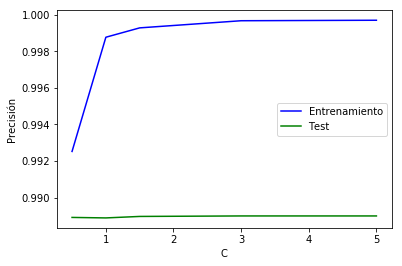

In [24]:
plt.plot(C_values, train_scores.mean(axis=1), 'b', label="Entrenamiento")
plt.plot(C_values, test_scores.mean(axis=1), 'g', label="Test")
plt.ylabel('Precisión')
plt.xlabel('C')
plt.legend(loc="best");

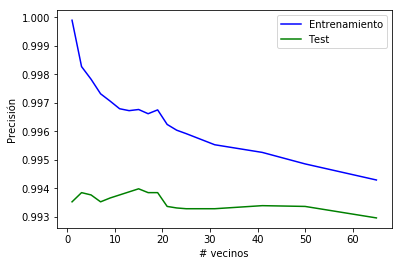

In [25]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_vecinos = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 31, 41, 50, 65]

train_scores, test_scores = validation_curve(KNeighborsClassifier(), dataset_X, dataset_y, param_name='n_neighbors', param_range=k_vecinos)
plt.plot(k_vecinos, train_scores.mean(axis=1), 'b', label="Entrenamiento")
plt.plot(k_vecinos, test_scores.mean(axis=1), 'g', label="Test")
plt.ylabel('Precisión')
plt.xlabel('# vecinos')
plt.legend(loc="best");

In [26]:
params_dist = {  
    "n_estimators": st.randint(3, 40), # Genera valores aleatorios entre el valor minimo y máximo
    "max_depth": st.randint(3, 40), 
    "learning_rate": st.uniform(0.05, 0.4), 
    "colsample_bytree": st.uniform(0.7, 0.3), # Genera valores aleatorios con media - variancia
    "subsample": st.uniform(0.6, 0.4),
}

random_xgboost = RandomizedSearchCV(
    XGBClassifier(), 
    param_distributions=params_dist, 
    n_jobs=4, 
    n_iter=1000, 
    scoring='roc_auc', 
    random_state=42
)

In [27]:
random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=1000, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1d464710>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e7347f0>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e4384a8>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e438e10>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object 

In [28]:
random_xgboost.best_params_

{'colsample_bytree': 0.8682623390087852,
 'learning_rate': 0.3955846322940041,
 'max_depth': 10,
 'n_estimators': 35,
 'subsample': 0.6547996252214685}

In [29]:
model4 = XGBClassifier(colsample_bytree = 0.8682623390087852,
 learning_rate= 0.3955846322940041,
 max_depth= 10,
 n_estimators= 35,
 subsample= 0.6547996252214685)
model4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8682623390087852, gamma=0,
       learning_rate=0.3955846322940041, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=35, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.6547996252214685, verbosity=1)

In [30]:
model4.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9962365591397849

In [31]:
model5 = KNeighborsClassifier(n_neighbors=50)
model5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [32]:
model5.score(X_test, y_test)

0.9950716845878136

In [33]:
model5_improved = KNeighborsClassifier(n_neighbors=1)
model5_improved.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
model5_improved.score(X_test, y_test)

0.9955197132616488

In [35]:
from sklearn.svm import SVC
clf = SVC(C=3, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.989336917562724


In [36]:
clf.score(X_test, y_test)

0.989336917562724

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d438ba8>,
      dtype=object)

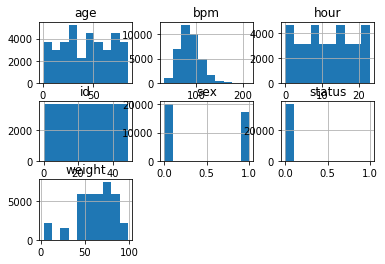

In [38]:
df.hist()

# Conclusiones

* Que conclusiones obtienes
* Tiempos de entrenamiento?
* Merece siempre la pena?

En primer lugar el dataset tiene unas propiedades que hace tener una variación muy pequeña al aplicar distintos algoritmos supervisados; por lo que se dar un caso de unos datos balanceados a priori.

Por otro lado, al evaluar los algoritmos se observa un high score en la mayoría. Los tiempos de espera con XGboost  y SVM - especialmente en el cálculo de mejor hiperparametrización - son mayores que K vecinos. 

En este caso K vecinos muestra un resultado alto en la mayoría de sus procesamientos con una buen ratio de score/tiempo de procesamiento; en los casos probados nos encontramos ante un procesamiento muy alto en consumo de recursos para la mejora final que se obtiene.